In [1]:
import seaborn as sns
from sklearn.datasets import load_iris 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=load_iris()

In [3]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df= pd.DataFrame(data['data'], columns=data['feature_names'])
target = pd.Series(data['target'], name='species')

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int32

In [7]:
plt.rcParams['figure.figsize'] = 10, 5
plt.rcParams['axes.labelsize'] = 20 
plt.rcParams['axes.labelcolor'] = "green"

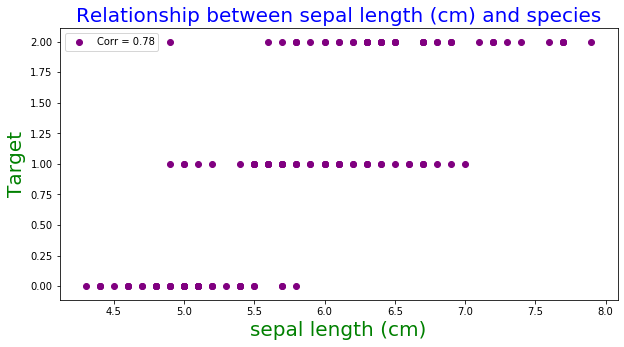

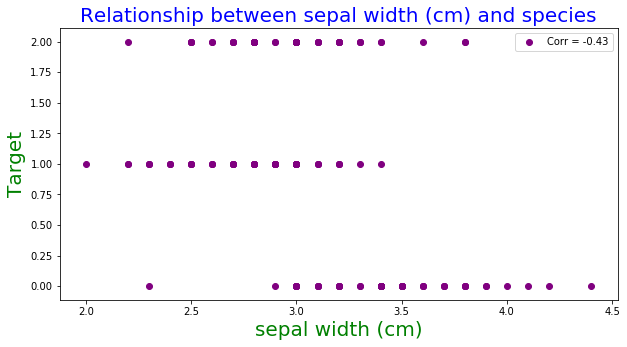

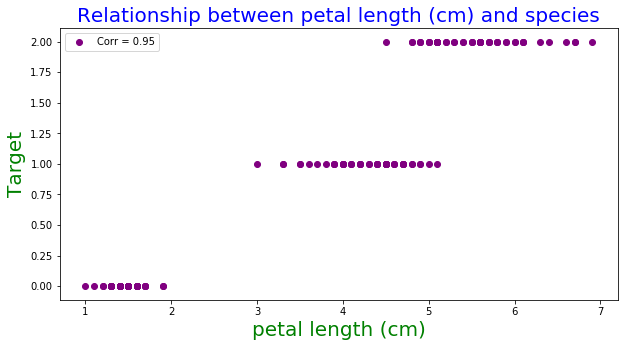

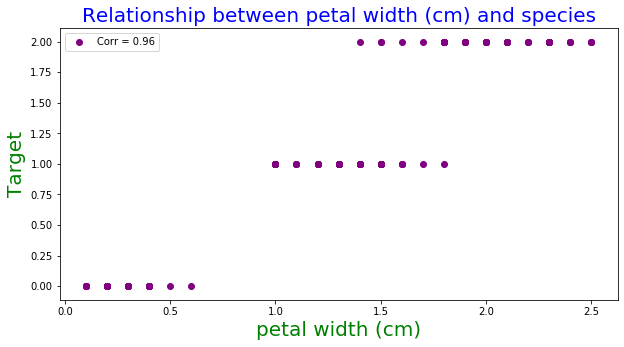

In [8]:
for column in df:
    corr = np.corrcoef(df[column],target)[0][1]
    plt.title(f"Relationship between {column} and species" , fontsize="20",color='blue')
    plt.scatter(df[column],target, label=f'Corr = {corr:.2f}',color="purple")
    plt.xlabel(column)
    plt.ylabel("Target")
    plt.legend()
    plt.show()

In [9]:
train_size = round(df.shape[0]*.80) 
test_size = df.shape[0] - train_size 
print(train_size, test_size, df.shape[0])

120 30 150


In [10]:
X_train, X_test, y_train, y_test = train_test_split(df, target,random_state=53, test_size=0.2)

In [12]:
X_test.shape

(30, 4)

In [13]:
X_train.shape

(120, 4)

In [14]:
model_1 = LinearRegression()
model_2 = LinearRegression(normalize=True)

In [15]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [16]:
y_pred_1 = model_1.predict(X_test)
y_pred_2 = model_2.predict(X_test)

In [17]:
print("Accuracy of Model-1: ", r2_score(y_test, y_pred_1)) 
print("Error of Model-1: ", mean_absolute_error(y_test, y_pred_1))

Accuracy of Model-1:  0.9074235535555805
Error of Model-1:  0.17931509485017774


In [19]:
scaled = StandardScaler()
scaled_df = scaled.fit_transform(df)

In [24]:
X_train , X_test , y_train,y_test = train_test_split(scaled_df,target,random_state=101)

In [25]:
model = LinearRegression() 
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
y_pred = model.predict(X_test)
print("Accuracy of Model: ", r2_score(y_test, y_pred)) 
print("Error of Model: ", mean_absolute_error(y_test, y_pred) )

Accuracy of Model:  0.9052049635207768
Error of Model:  0.18597825724784736
